## PEAK 3 Y24 phosphorylation

model PEAK3

J0: PEAK3_Y24 -> PEAK3_Y24P; J0_Vmax*PEAK3_Y24/(J0_Km + PEAK3_Y24)
J1: PEAK3_Y24P -> PEAK3_Y24; J1_Vmax*PEAK3_Y24P/(J1_Km + PEAK3_Y24P)

# State variables in the system
PEAK3_Y24=100
PEAK3_Y24P=0

# Parameters in the system
J0_Km=100
J0_Vmax=10
J1_Km=100
J1_Vmax=10

end


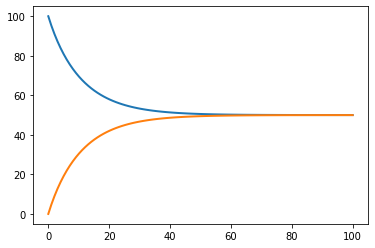

In [4]:
from models.ModelBuilder import ModelBuilder
from models.Reaction import Reaction
from models.ReactionArchtype import ReactionArchtype
from models.ArchtypeCollections import *

model = ModelBuilder('PEAK3')
model.add_reaction(Reaction(michaelis_menten, ('PEAK3_Y24',), ('PEAK3_Y24P',)))
model.add_reaction(Reaction(michaelis_menten, ('PEAK3_Y24P',), ('PEAK3_Y24',), reactant_values=0, product_values=100))

print(model.get_antimony_model())

model.simulate(0, 100, 100)
model.plot()


In [ ]:
# use antimony's default modularity to create model 

import antimony
import roadrunner
import matplotlib.pyplot as plt

ant_model = """

model MichaelisMenten(F, B)
    J0:F -> B; Vmf * F / (Kmf + F)
    J1:B -> F; Vmb * B / (Kmb + B)

    # default values
    Vmf = 10
    Vmb = 10
    Kmf = 100
    Kmb = 100
end

model SimpleMassAction(A, B)
    J0:A -> B; ka * A - kd * B
    J1:B -> A; kd * B - ka * A
    # default values
    ka = 0.01
    kd = 0.01
end

model MassAction21(A,B,AB)
    J0:A + B -> AB; ka * A * B - kd * AB
    J1:AB -> A + B; kd * AB - ka * A * B

    # default values
    ka = 0.001
    kd = 0.01

    # bound variables
    TA = A + AB
    TB = B + AB

end


model simple_peak3
    # Examples of different rate laws and initialization
    
    E0: MassAction21(PEAK3, GRB2, PEAK3_GRB2)
    E1: MassAction21(PEAK3, CRKII, PEAK3_CRKII)
    E2: MassAction21(TotalGRB2, ASAP1, GRB2_ASAP1)
    E3: MassAction21(TotalCRKII, ASAP1, CRKII_ASAP1)

    PEAK3 = 100 
    GRB2 = 100
    CRKII = 100
    TotalGRB2 = GRB2 + PEAK3_GRB2 
    TotalCRKII = CRKII + PEAK3_CRKII
    ASAP1 = 100

end
"""

antimony.clearPreviousLoads()
antimony.freeAll()
code = antimony.loadAntimonyString(ant_model)
if code >= 0:
    mid = antimony.getMainModuleName()
    sbml_model = antimony.getSBMLString(mid)
    print('Antimony model compiled without error')
else:
    print(code)
r_model = roadrunner.RoadRunner(sbml_model)
# r_model.model['S3'] = 1
# print(r_model.model['S3'])


r_solved = r_model.simulate(0, 100, 100)

print(r_solved)

r_model.plot()

# plt.plot(r_solved['time'], label='TA')
# plt.legend()
# plt.grid()
# plt.show()

print(r_model.model.keys())
# print(r_model.model['S3'])
# print(r_solved)
# plt.plot(r_solved)


## Testing ground

In [26]:
import itertools

l = ['A', 'B', 'C', 'D']
r = list(itertools.combinations(l, 3))

# A bind both B and C
# D bind to either B or C

print(r)

[('A', 'B', 'C'), ('A', 'B', 'D'), ('A', 'C', 'D'), ('B', 'C', 'D')]


In [ ]:
## Representing Protein A with 1 binding site 
# A_0 + B -> A_1B

## Building PEAK3 model using ModelBuilder

model peak3model

cr1: pEGFR -> EGFR; cr1_Vmax*pEGFR/(cr1_Km + pEGFR)
J1: EGFR -> pEGFR; J1_Vmax*EGFR*(egf*J1_Ka0)/(J1_Km + EGFR)
J2: rEGFR -> EGFR; J2_Vmax*rEGFR/(J2_Km + rEGFR)
J3: EGFR -> rEGFR; J3_Vmax*EGFR*(total_PEAK3*J3_Ka0)/(J3_Km + EGFR)
J4: rpEGFR -> pEGFR; J4_Vmax*rpEGFR/(J4_Km + rpEGFR)
J5: pEGFR -> rpEGFR; J5_Vmax*pEGFR*(total_PEAK3*J5_Ka0)/(J5_Km + pEGFR)
J6: rpEGFR -> rEGFR; cr1_Vmax*rpEGFR/(cr1_Km + rpEGFR)
J7: rEGFR -> rpEGFR; J7_Vmax*rEGFR*(egf*J7_Ka0)/(J7_Km + rEGFR)
J8: pPEAK3 -> PEAK3; J8_Vmax*pPEAK3/(J8_Km + pPEAK3)
J9: PEAK3 -> pPEAK3; J9_Vmax*PEAK3/(J9_Km + PEAK3)
J10: pShc -> Shc; J10_Vmax*pShc/(J10_Km + pShc)
J11: Shc -> pShc; J11_Vmax*Shc*(total_pEGFR*J11_Ka0)/(J11_Km + Shc)
J12: rpShc -> rShc; J12_Vmax*rpShc/(J12_Km + rpShc)
J13: rShc -> rpShc; J13_Vmax*rShc*(total_pEGFR*J13_Ka0)/(J13_Km + rShc)
J14: rShc -> Shc; J14_Vmax*rShc/(J14_Km + rShc)
J15: Shc -> rShc; J15_Vmax*Shc*(total_PEAK3*J15_Ka0)/(J15_Km + Shc)
J16: rpShc -> pShc; J16_Vmax*rpShc/(J16_Km + rpSh

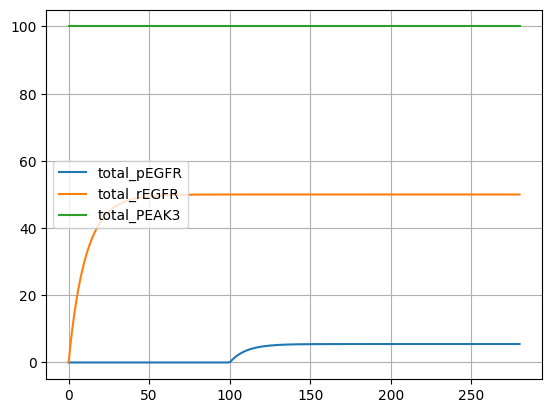

In [1]:
from models.ModelBuilder import ModelBuilder
from models.Reaction import Reaction
from models.ReactionArchtype import ReactionArchtype
from models.ArchtypeCollections import *

import roadrunner
import matplotlib.pyplot as plt

peak3_model = ModelBuilder('peak3model')

# naming key:
# p = phosphorylated
# r = recruited

## Upstream EGF signalling 

# Input: EGF, pPEAK3
# Output: pEGFR, rEGFR (in total)

# EGFR <-> pEGFR
peak3_model.add_reaction(Reaction(michaelis_menten, ('pEGFR',), ('EGFR',), 'cr1'))
peak3_model.add_reaction(Reaction(create_archtype_michaelis_menten(1), ('EGFR',), ('pEGFR',), extra_states=('egf',)))

# EGFR <-> rEGFR 
peak3_model.add_reaction(Reaction(michaelis_menten, ('rEGFR',), ('EGFR',)))
peak3_model.add_reaction(Reaction(create_archtype_michaelis_menten(1), ('EGFR',), ('rEGFR',), extra_states=('total_PEAK3',)))

# pEGFR <-> rpEGFR
peak3_model.add_reaction(Reaction(michaelis_menten, ('rpEGFR',), ('pEGFR',), reactant_values=0, product_values=0))
peak3_model.add_reaction(Reaction(create_archtype_michaelis_menten(1), ('pEGFR',), ('rpEGFR',), extra_states=('total_PEAK3',), reactant_values=0, product_values=0))

# rEGFR <-> rpEGFR
peak3_model.add_reaction(Reaction(michaelis_menten, ('rpEGFR',), ('rEGFR',), reactant_values=0, product_values=0, use_parameter_from_reaction='cr1'))
peak3_model.add_reaction(Reaction(create_archtype_michaelis_menten(1), ('rEGFR',), ('rpEGFR',), extra_states=('egf',), reactant_values=0, product_values=0))

peak3_model.add_custom_variables('total_pEGFR', 'total_pEGFR := pEGFR + rpEGFR')
peak3_model.add_custom_variables('total_rEGFR', 'total_rEGFR := rEGFR + rpEGFR')

peak3_model.add_simple_piecewise(0,100,8.33,'egf')

## PEAK3 

# PEAK3 <-> pPEAK3
peak3_model.add_reaction(Reaction(michaelis_menten, ('pPEAK3',), ('PEAK3',)))
peak3_model.add_reaction(Reaction(michaelis_menten, ('PEAK3',), ('pPEAK3',)))

peak3_model.add_custom_variables('total_PEAK3', 'total_PEAK3 := pPEAK3 + PEAK3')

## Shc complex formation and dephosphorylation of PEAK3 

# Input: total_pEGFR, pPEAK3
# Output to PEAK3: rpShc 

peak3_model.add_reaction(Reaction(michaelis_menten, ('pShc',), ('Shc',)))
peak3_model.add_reaction(Reaction(create_archtype_michaelis_menten(1), ('Shc',), ('pShc',), extra_states=('total_pEGFR',)))

peak3_model.add_reaction(Reaction(michaelis_menten, ('rpShc',), ('rShc',)))
peak3_model.add_reaction(Reaction(create_archtype_michaelis_menten(1), ('rShc',), ('rpShc',), extra_states=('total_pEGFR',)))

peak3_model.add_reaction(Reaction(michaelis_menten, ('rShc',), ('Shc',)))
peak3_model.add_reaction(Reaction(create_archtype_michaelis_menten(1), ('Shc',), ('rShc',), extra_states=('total_PEAK3',)))

peak3_model.add_reaction(Reaction(michaelis_menten, ('rpShc',), ('pShc',)))
peak3_model.add_reaction(Reaction(create_archtype_michaelis_menten(1), ('pShc',), ('rpShc',), extra_states=('total_PEAK3',)))

## 


print(peak3_model.get_antimony_model())

### FINISHED MODEL CONSTRUCTION, BEGIN TEST SIMULATION

sbml = peak3_model.get_sbml_model()
rr = roadrunner.RoadRunner(sbml)

states = peak3_model.get_all_variables_keys()
custom_states = peak3_model.get_custom_variable_keys()
sim_states = ['time'] + states
states_no_egf = [s for s in custom_states if s != 'egf']
res = rr.simulate(0, 280, 280, selections=sim_states)

for state in states_no_egf:
    plt.plot(res['time'], res[f'{state}'], label=state)

plt.legend()
plt.grid()
plt.show()
